##Reconocimiento de género por voz y análisis del habla

Esta base de datos se creó para identificar una voz como masculina o femenina, según las propiedades acústicas de la voz y el habla. El conjunto de datos consta de 3,168 muestras de voz grabadas, recopiladas de oradores masculinos y femeninos. Las muestras de voz se preprocesan mediante análisis acústico en R utilizando los paquetes seewave y tuneR, con un rango de frecuencia analizado de 0 hz-280 hz

**El conjunto de datos**

**meanfreq** : frecuencia media (en kHz)
**sd** : desviación estándar de la frecuencia
**mediana** : frecuencia media (en kHz)
**Q25** : primer cuantil (en kHz)
**Q75** : tercer cuantil (en kHz)
**IQR** : rango intercuantil (en kHz)
**skew** : skewness (ver nota en la descripción de specprop)
**kurt** : kurtosis (ver nota en la descripción de specprop)
**sp.ent** : entropía espectral
**sfm** : planitud espectral
**modo** : frecuencia de modo
**centroide** : centroide de frecuencia (ver specprop)
**peakf** : frecuencia pico (frecuencia con la energía más alta)
**meanfun** : promedio de la frecuencia fundamental medida a través de la señal acústica
**Minfun** : frecuencia fundamental mínima medida a través de la señal acústica
**maxfun** : frecuencia fundamental máxima medida a través de la señal acústica
**meandom** : promedio de la frecuencia dominante medida a través de la señal acústica
**Mindom** : mínimo de frecuencia dominante medida a través de la señal acústica
**maxdom** : máximo de la frecuencia dominante medida a través de la señal acústica
**dfrange** : rango de frecuencia dominante medido a través de la señal acústica
**modindx** : indice de modulacion. Calculado como la diferencia absoluta acumulada entre mediciones adyacentes de frecuencias fundamentales dividida por el rango de frecuencia
**etiqueta** : hombre o mujer

Importanto librerias

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

**Levantando data desde Drive**

In [0]:
#Levantar Dataset desde Drive con Colab
#--------------------------------------------------#
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Exploración Datos

**importación**

In [0]:

file = "/content/gdrive/My Drive/voice.csv"
#https://www.kaggle.com/primaryobjects/voicegender
#https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis
df = pd.read_csv(file)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [0]:
df.shape

(3168, 21)

In [0]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

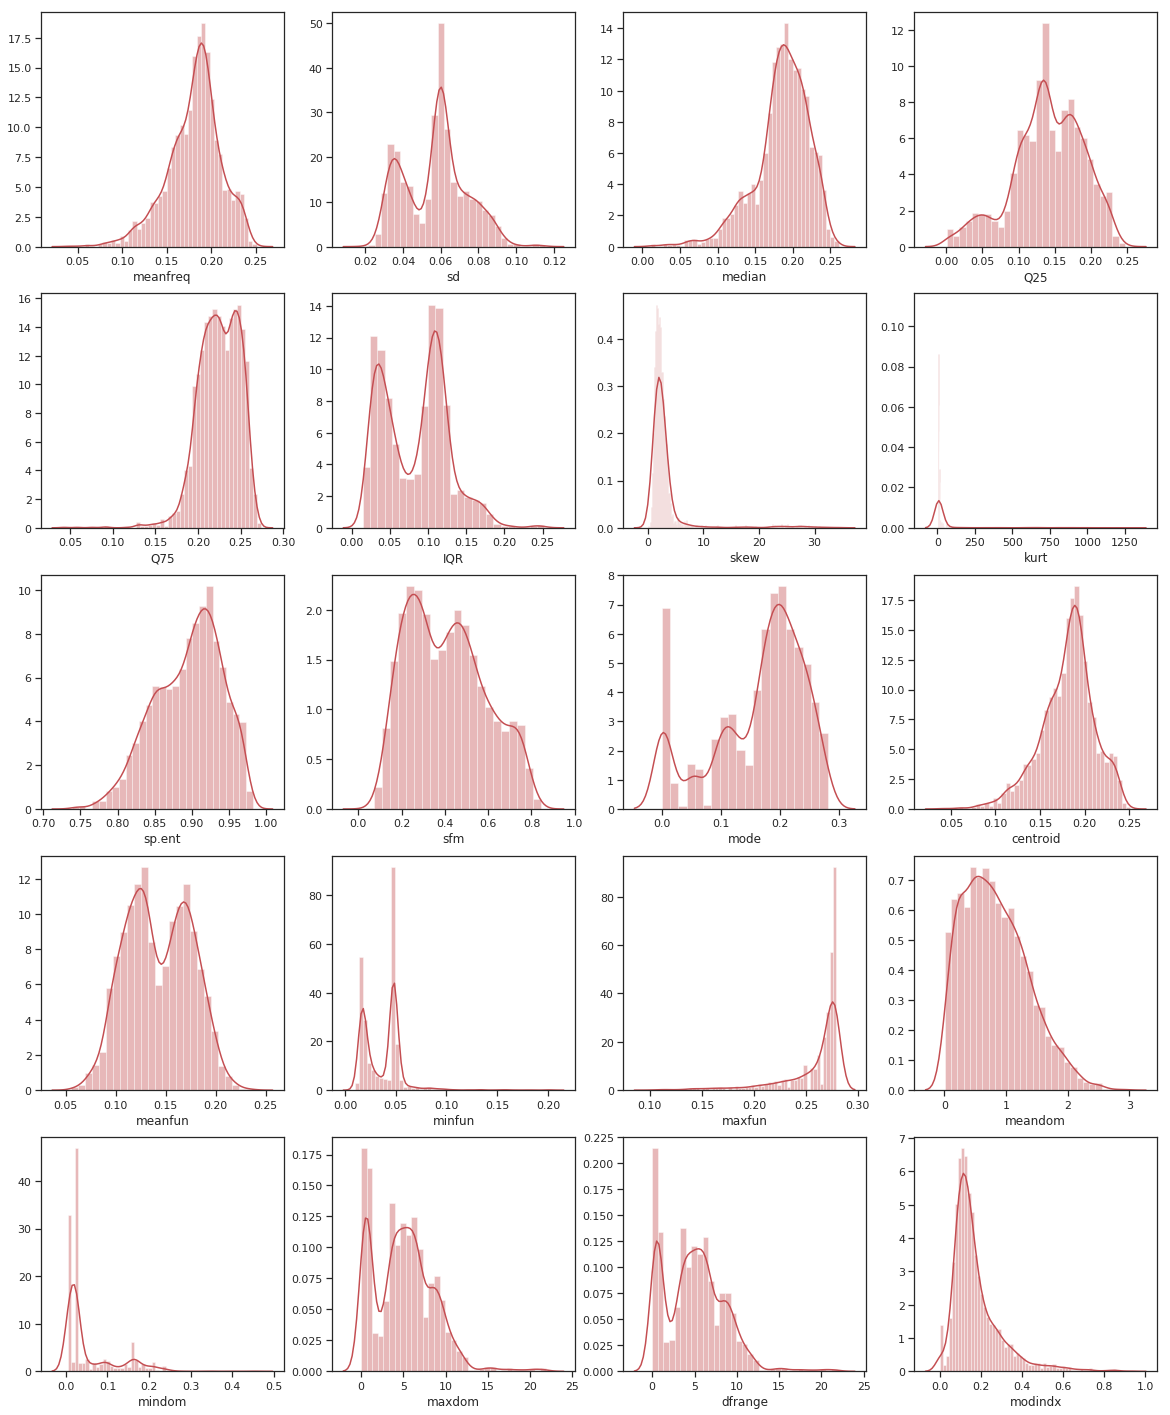

In [0]:
columns = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt','sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun','meandom','mindom', 'maxdom', 'dfrange', 'modindx']
fig = plt.subplots(figsize = (20,25))

for i, col in enumerate(columns):
  plt.subplot(5,4,i+1)
  data = df[col]
  sns.distplot(data, bins='auto', color='r')

In [0]:
df["kurt"].describe()

count    3168.000000
mean       36.568461
std       134.928661
min         2.068455
25%         5.669547
50%         8.318463
75%        13.648905
max      1309.612887
Name: kurt, dtype: float64

**Correalaciones***

In [0]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


**Valores Nulos**

In [0]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [0]:
df.shape

(3168, 21)

##Preprocesamiento

**Proporción Target**

In [0]:
df.groupby(["label"]).size()

label
female    1584
male      1584
dtype: int64

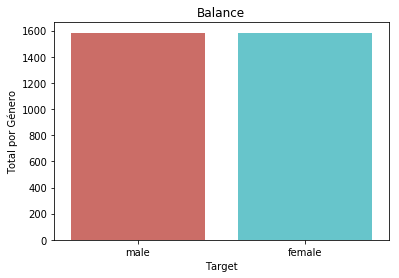

In [0]:
import seaborn as sns
sns.countplot(x="label", data = df, palette ="hls")
plt.title("Balance")
plt.xlabel('Target')
plt.ylabel('Total por Género')
plt.show()

**Separando Variable predictoras de la target**

In [0]:
X=df.iloc[:, :-1]
X.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


**String a Entero Target**

In [0]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]
# Encode label category
# male -> 1
# female -> 0
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

**Data Standardisation**

In [0]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
X[0:1,:]

array([[-4.04924806,  0.4273553 , -4.22490077, -2.57610164, -5.69360723,
        -0.21477826,  2.29330585,  1.76294635, -0.03908279,  0.4715753 ,
        -2.14121031, -4.04924806, -1.81203825, -1.0979981 ,  0.56595854,
        -1.5642046 , -0.70840431, -1.43142165, -1.41913712, -1.45477229]])

**Separando Data en Test y Prueba**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##Modelado

In [0]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)

**SVM Parametros por defecto**

In [0]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
accuracy_score(y_test, y_pred)

0.9763406940063092

Text(0.5, 1.0, 'MATRIZ DE CONFUSION')

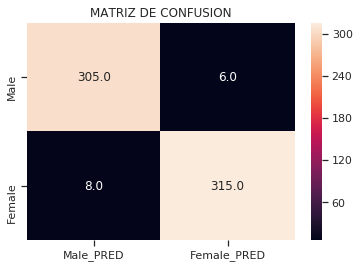

In [0]:
conf = confusion_matrix(y_test, y_pred)
label_y = ['Male','Female']
label_x = ['Male_PRED', 'Female_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")
plt.title("MATRIZ DE CONFUSION")

**SVM Kernel Lineal -  Por Defecto**

In [0]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


Text(0.5, 1.0, 'MATRIZ DE CONFUSION')

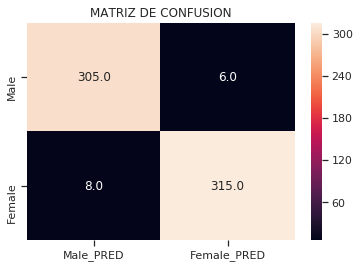

In [0]:
conf = confusion_matrix(y_test, y_pred)
label_y = ['Male','Female']
label_x = ['Male_PRED', 'Female_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")
plt.title("MATRIZ DE CONFUSION")

**SVM Kenel Radial - Por defecto**

In [0]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'MATRIZ DE CONFUSION')

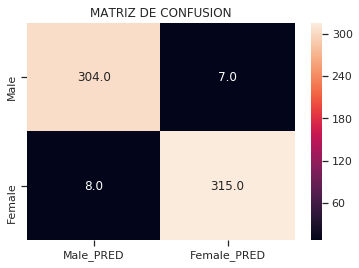

In [0]:
conf = confusion_matrix(y_test, y_pred)
label_y = ['Male','Female']
label_x = ['Male_PRED', 'Female_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")
plt.title("MATRIZ DE CONFUSION")

**SVM Kenel Polinomial - Por defecto**

In [0]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'MATRIZ DE CONFUSION')

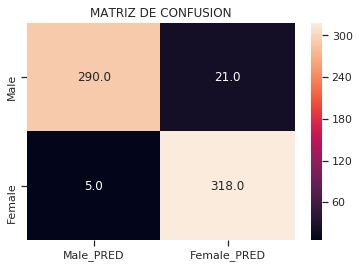

In [0]:
conf = confusion_matrix(y_test, y_pred)
label_y = ['Male','Female']
label_x = ['Male_PRED', 'Female_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")
plt.title("MATRIZ DE CONFUSION")

**VALIDACIÓN CRUZADA**

**kernel Lineal**

In [0]:
#!pip install -U scikit-learn

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
#from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.91194969 0.97169811 0.97169811 0.97169811 0.96202532 0.98734177
 0.99050633 0.98101266 0.95253165 0.99367089]


In [0]:

print(scores.mean())

0.9694132632752168


**Kernel Radial**

In [0]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.93396226 0.95597484 0.96855346 0.9591195  0.96835443 0.99683544
 0.98734177 0.98101266 0.91455696 0.99367089]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
print(scores.mean())

0.9659382214791815


**Kernel Polinomial**

In [0]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.89937107 0.94654088 0.93081761 0.91509434 0.95886076 1.
 0.98101266 0.96835443 0.87974684 0.9778481 ]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
print(scores.mean())

0.9457646684181196


##Tuninng

TUNINNG con VC

**KERNEL LINEAL**

**Para valores muy grandes de C podemos causar un ajuste excesivo del modelo y para un valor muy pequeño de C podemos causar un ajuste insuficiente. Por lo tanto, el valor de C debe elegirse de tal manera que generalice bien los datos invisibles.

In [0]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9694132632752168, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9694132632752168, 0.9690987978664118, 0.9687843324576069, 0.9684698670488018, 0.9684698670488018, 0.9684698670488018, 0.9684698670488018, 0.9681534113525991, 0.9681534113525991, 0.9681534113525991, 0.9681534113525991, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.9678369556563966, 0.9681534113525991, 0.9684678767614043, 0.9684678767614043, 0.9681514210652018, 0.9681514210652018]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cross-Validated Accuracy')

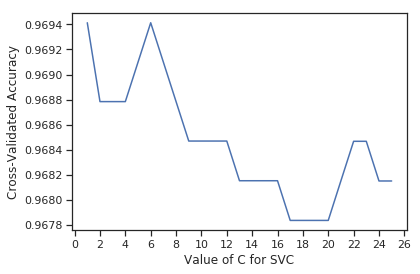

In [0]:
C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

De la gráfica anterior podemos ver que la precisión ha sido cercana al 97% para C = 1 y C = 6 y luego cae alrededor del 96.8% y permanece constante.

**Veamos con más detalle cuál es el valor exacto de C, que nos da una buena puntuación de precisión.**

In [0]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9700481649550194, 0.9691007881538095, 0.9690987978664118, 0.9690987978664118, 0.9694132632752168, 0.9694132632752168, 0.9697277286840219, 0.9694112729878194, 0.9690968075790144, 0.9694132632752168, 0.9694132632752168, 0.9694132632752168, 0.9694132632752168, 0.9687823421702095, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9690987978664118, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118, 0.9690987978664118,

Text(0, 0.5, 'Cross-Validated Accuracy')

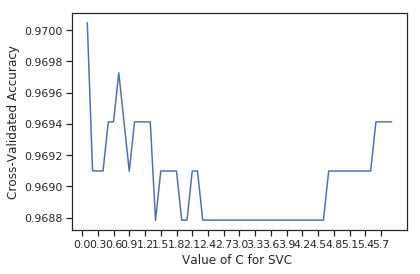

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

**La puntuación de precisión es más alta para C = 0.1.**



**KERNEL RADIAL**

Tomando el kernel como rbf y tomando diferentes valores **gamma**.
Técnicamente, el parámetro gamma es el inverso de la desviación estándar del kernel RBF (función gaussiana), que se utiliza como medida de similitud entre dos puntos. Intuitivamente, un valor gamma pequeño define una función gaussiana con una gran variación. En este caso, dos puntos pueden considerarse similares incluso si están lejos uno del otro. Por otro lado, un valor gamma grande significa definir una función gaussiana con una varianza pequeña y, en este caso, dos puntos se consideran similares solo si están cerca uno del otro.



In [0]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.8878114799777087, 0.9552463975798107, 0.9681514210652018, 0.9630960910755512, 0.9072366849773108, 0.5955377756548046, 0.5]


Text(0, 0.5, 'Cross-Validated Accuracy')

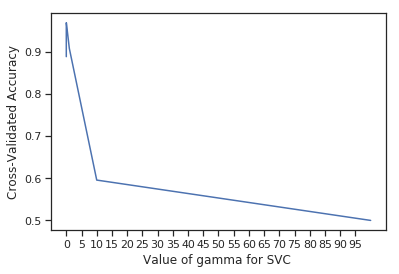

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

Podemos ver que para gamma = 10 y 100 el kernel tiene un rendimiento deficiente. También podemos ver un ligero descenso en la puntuación de precisión cuando gamma es 1. Veamos más detalles para el rango de 0,0001 a 0,1.

In [0]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.8878114799777087, 0.9552463975798107, 0.9681514210652018, 0.9630960910755512]


Text(0, 0.5, 'Cross-Validated Accuracy')

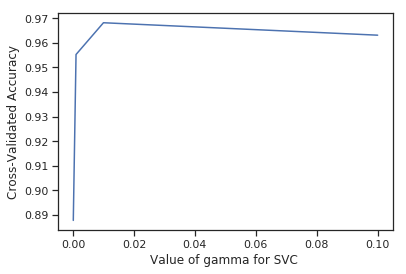

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

El puntaje aumenta constantemente y alcanza su pico máximo en 0.01 y luego disminuye hasta que gamma = 1. Así Gamma debería estar alrededor de 0.01.

Veamos con más detalle los valores gamma.

In [0]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.9681514210652018, 0.9678389459437945, 0.9678349653689992, 0.9668895788551864, 0.9659382214791815]


Text(0, 0.5, 'Cross-Validated Accuracy')

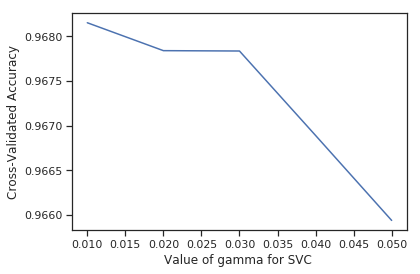

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Podemos ver que hay una disminución constante en la puntuación de precisión a medida que aumenta el valor gamma. Por lo tanto, gamma = 0.01 es el mejor parámetro.

**KERNEL POLINOMIAL**

Grados


In [0]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

Text(0, 0.5, 'Cross-Validated Accuracy')

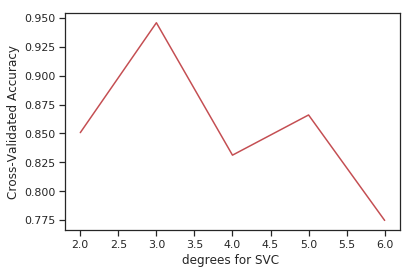

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

El puntaje es alto para el polinomio de tercer grado y luego disminuye el puntaje de precisión a medida que aumenta el grado del polinomio. Por lo tanto, el aumento en el grado polinomial da como resultado una alta complejidad del modelo y, por lo tanto, causa un sobreajuste.

##HIPERPARAMETROS

**LINEAL C = 0.1**

In [0]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9747634069400631


CV=10

In [0]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.90880503 0.97169811 0.97484277 0.96855346 0.96202532 0.99050633
 0.99050633 0.98101266 0.95886076 0.99367089]


In [0]:
print(scores.mean())

0.9700481649550194


La precisión es ligeramente buena sin la validación cruzada de K-fold, pero puede no generalizar los datos invisibles. Por lo tanto, es recomendable realizar una validación cruzada de K-pliegue donde todos los datos están cubiertos, por lo que puede predecir bien los datos invisibles.

**RADIAL Gamma = 0.01**

In [0]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9668769716088328

CV = 10

In [0]:
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.91194969 0.97169811 0.97169811 0.97169811 0.96202532 0.98734177
 0.99050633 0.98101266 0.95253165 0.99367089]


In [0]:
print(scores.mean())

0.9694132632752168


**POLINOMIAL Grado = 3**

In [0]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9589905362776026


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


CV = 10

In [0]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.89937107 0.94654088 0.93081761 0.91509434 0.95886076 1.
 0.98101266 0.96835443 0.87974684 0.9778481 ]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
print(scores.mean())

0.9457646684181196


##GRIDSearch

Vamos a realizar la técnica de búsqueda de Grid para encontrar el mejor parámetro

In [0]:
from sklearn.svm import SVC
svm_model= SVC()

In [0]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [0]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [0]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9569850039463299


**Mejores Hiperparametros encontrados**

In [0]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [0]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9589905362776026


In [0]:
#FIN :D

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)

Text(0.5, 1.0, 'MATRIZ DE CONFUSION')

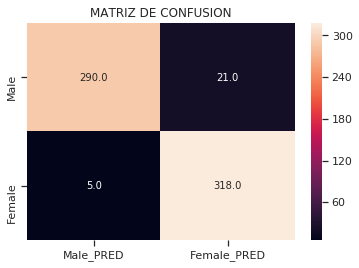

In [0]:
conf = confusion_matrix(y_test, y_pred)
label_y = ['Male','Female']
label_x = ['Male_PRED', 'Female_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")
plt.title("MATRIZ DE CONFUSION")